
# Bright Automotive Company - Data Analysis & Machine Learning

This notebook demonstrates the full data analysis lifecycle, including:
- Data loading
- Data cleaning
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model building and evaluation

Let's begin!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("bright_automotive_company (1).csv")
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1586 non-null   int64  
 1   Gender            1533 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1586 non-null   object 
 4   Education         1586 non-null   object 
 5   No_of_Dependents  1586 non-null   object 
 6   Personal_loan     1586 non-null   object 
 7   House_loan        1586 non-null   object 
 8   Partner_working   1586 non-null   object 
 9   Salary            1573 non-null   float64
 10  Partner_salary    1480 non-null   float64
 11  Total_salary      1586 non-null   int64  
 12  Price             1586 non-null   int64  
 13  Make              1586 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.6+ KB


In [3]:
df.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1586.000000,1533,1575,1586,1586,1586,1586,1586,1586,1573.000000,1480.000000,1586.000000,1586.000000,1586
unique,NaN,4,2,2,2,6,2,2,2,NaN,NaN,NaN,NaN,4
top,NaN,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1199,890,1448,990,562,794,1059,873,NaN,NaN,NaN,NaN,702
mean,32.018916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60340.368722,20348.513514,79806.431274,36006.972257,NaN
std,8.778502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14656.106826,19655.841385,25707.764534,21168.286950,NaN
min,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,58.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59500.000000,25700.000000,78050.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71800.000000,38300.000000,95975.000000,47000.000000,NaN


In [4]:
df['Profession'] = df['Profession'].fillna("Unknown")

In [5]:
df['Make'] = df['Make'].replace('?', np.nan)

In [6]:
df['Make'] = df['Make'].fillna(df['Make'].mode()[0])

In [7]:
df['No_of_Dependents'] = df['No_of_Dependents'].replace('?', np.nan).astype(float)

In [8]:
df['No_of_Dependents'] = df['No_of_Dependents'].fillna(df['No_of_Dependents'].median())

In [9]:
df['Gender'] = df['Gender'].replace('Femal', 'Female')

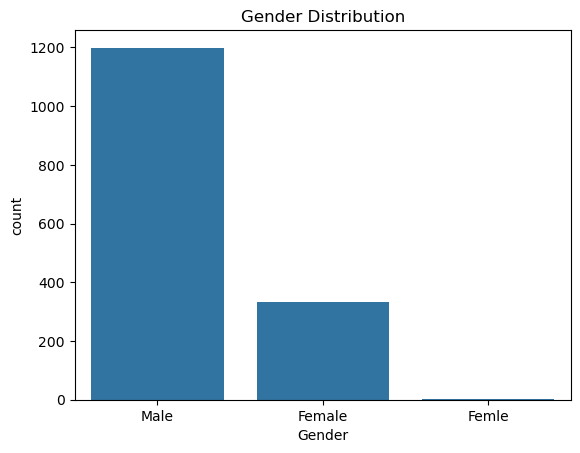

In [10]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

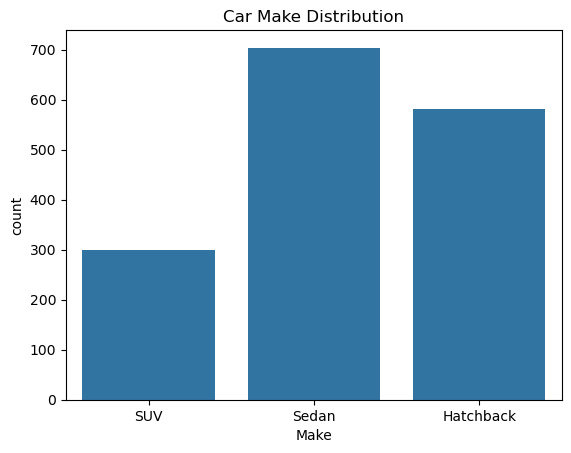

In [11]:
sns.countplot(x='Make', data=df)
plt.title("Car Make Distribution")
plt.show()

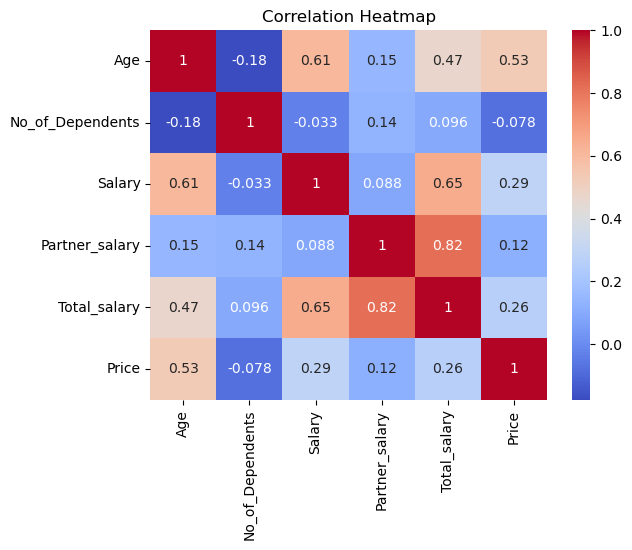

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
sns.set(style="whitegrid")


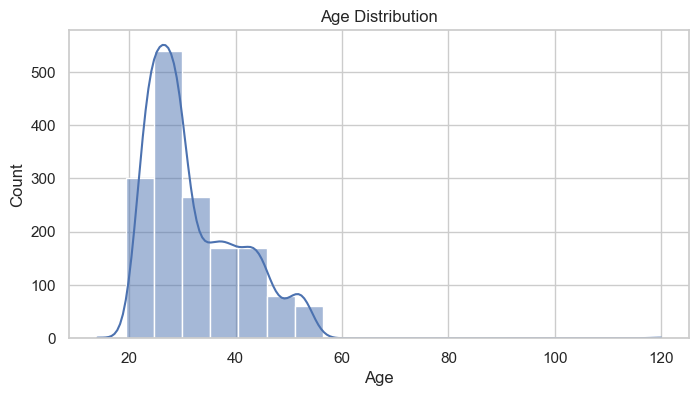

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

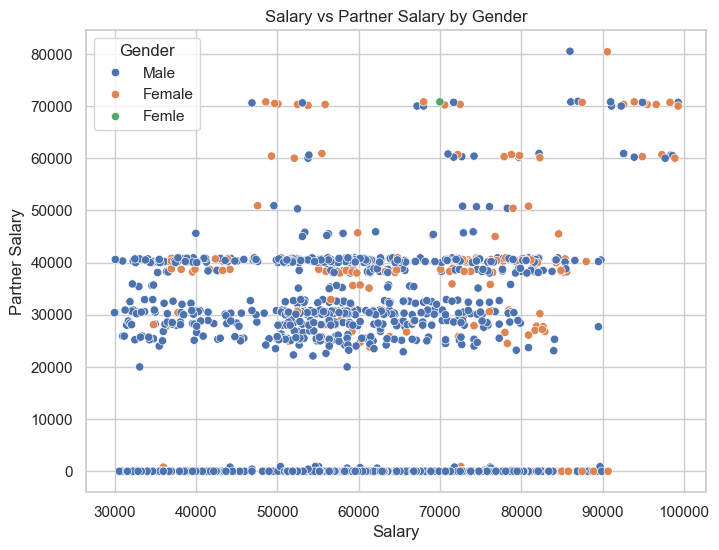

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Salary', y='Partner_salary', hue='Gender')
plt.title('Salary vs Partner Salary by Gender')
plt.xlabel('Salary')
plt.ylabel('Partner Salary')
plt.show()

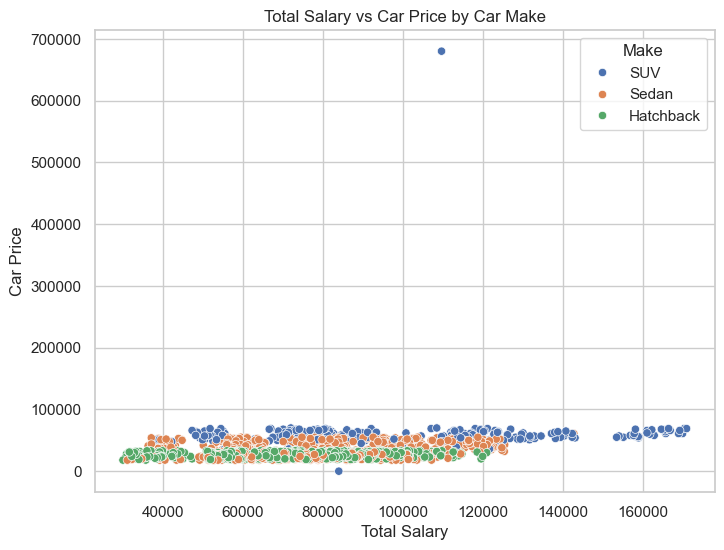

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_salary', y='Price', hue='Make')
plt.title('Total Salary vs Car Price by Car Make')
plt.xlabel('Total Salary')
plt.ylabel('Car Price')
plt.show()


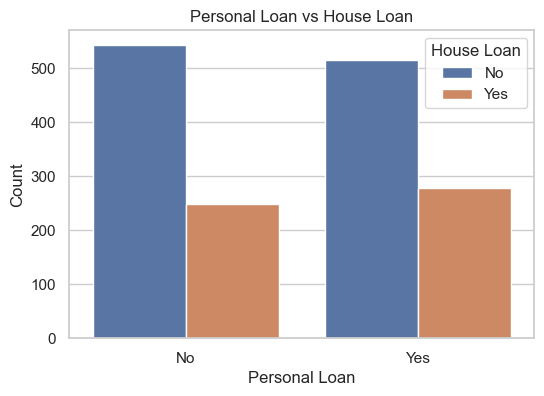

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Personal_loan', hue='House_loan')
plt.title('Personal Loan vs House Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='House Loan')
plt.show()

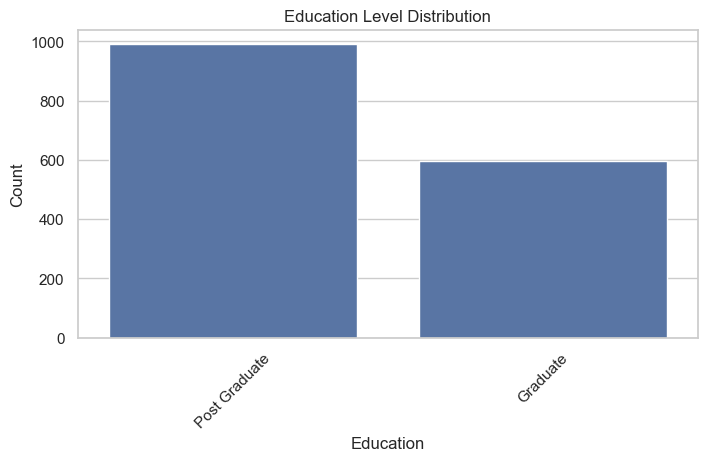

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

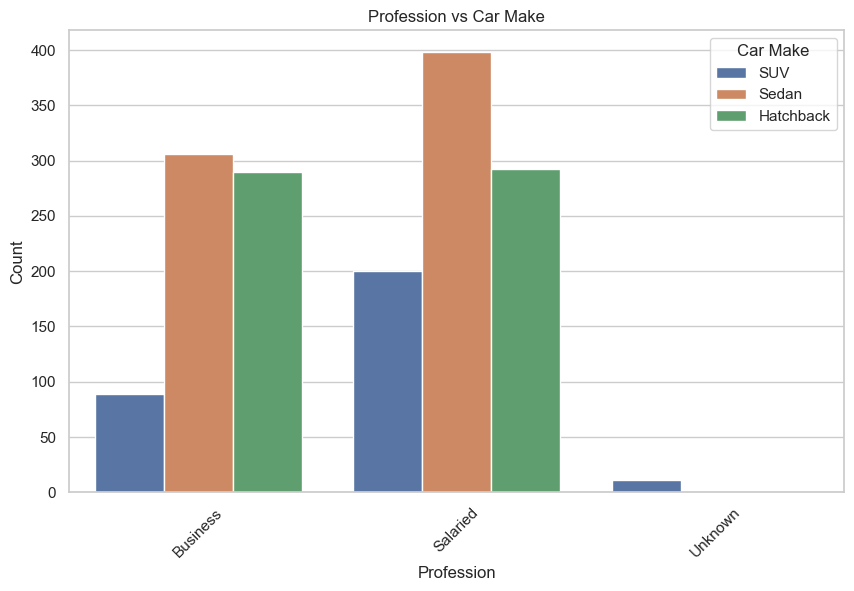

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', hue='Make')
plt.title('Profession vs Car Make')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Car Make')
plt.show()

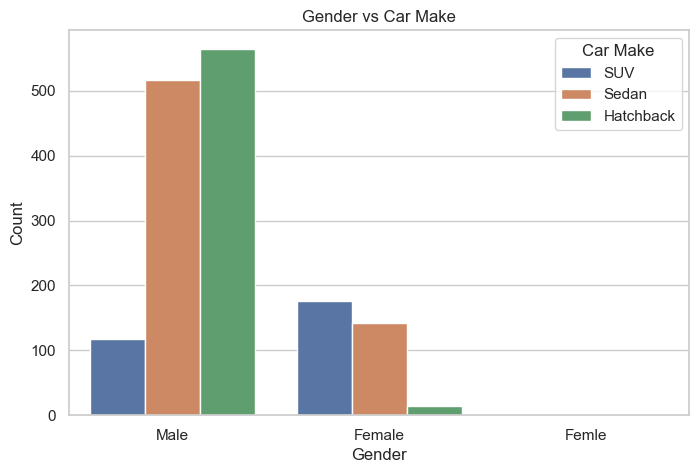

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Make')
plt.title('Gender vs Car Make')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Car Make')
plt.show()

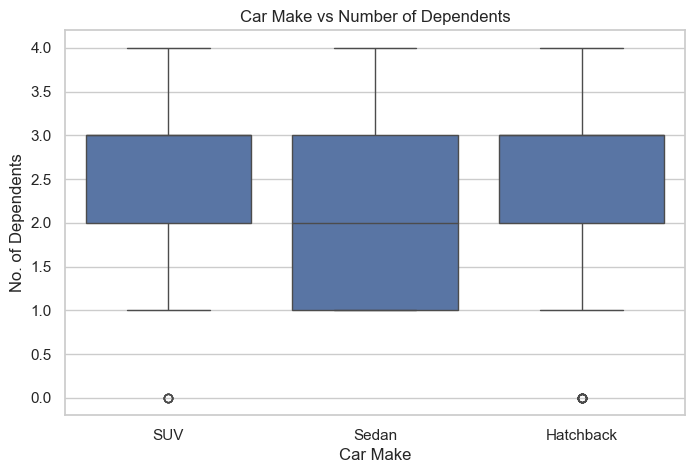

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Make', y='No_of_Dependents')
plt.title('Car Make vs Number of Dependents')
plt.xlabel('Car Make')
plt.ylabel('No. of Dependents')
plt.show()

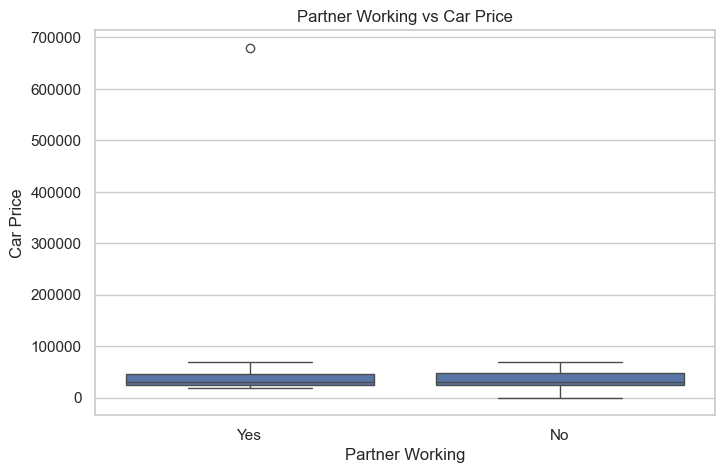

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Partner_working', y='Price')
plt.title('Partner Working vs Car Price')
plt.xlabel('Partner Working')
plt.ylabel('Car Price')
plt.show()

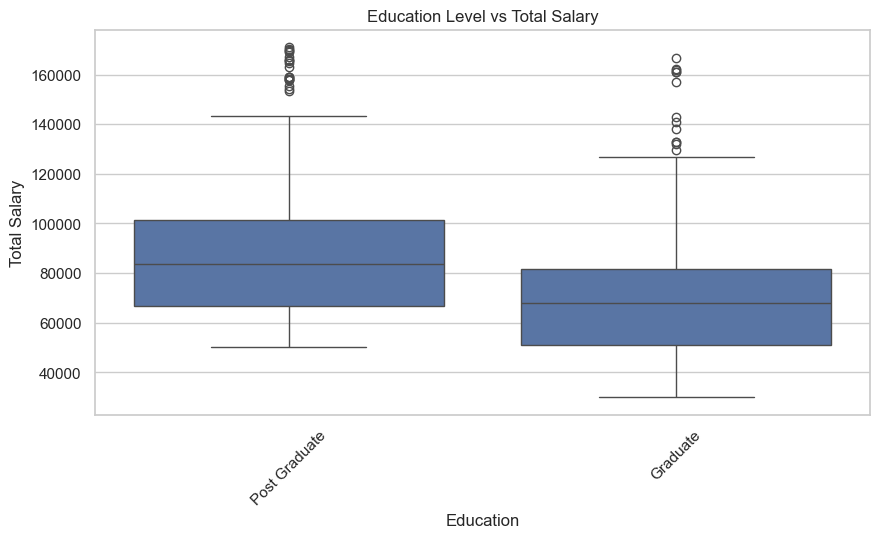

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Education', y='Total_salary')
plt.title('Education Level vs Total Salary')
plt.xlabel('Education')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()


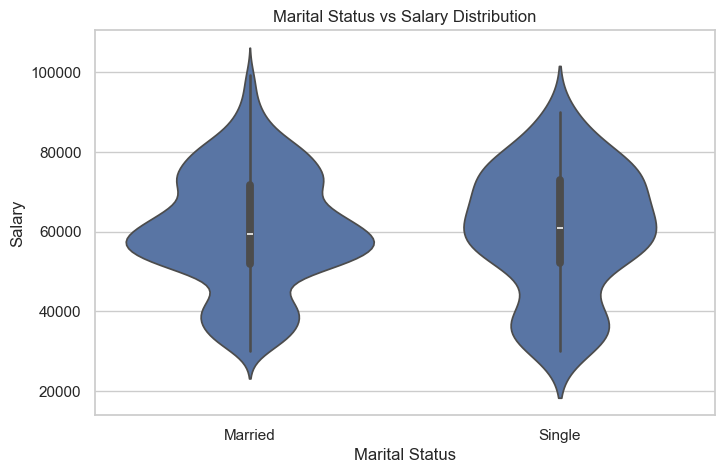

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Marital_status', y='Salary', inner='box')
plt.title('Marital Status vs Salary Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.show()

In [25]:
label_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
X = df.drop(columns=['Make'])  # We'll predict 'Make'
y = df['Make']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_pred),2) * 100,'%')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 80.0 %
Confusion Matrix:
 [[ 93   0  16]
 [  0  53  13]
 [ 31   5 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       109
           1       0.91      0.80      0.85        66
           2       0.79      0.75      0.77       143

    accuracy                           0.80       318
   macro avg       0.82      0.80      0.81       318
weighted avg       0.80      0.80      0.80       318




## Conclusion

This notebook demonstrated a complete machine learning pipeline from data cleaning to model evaluation.
The Random Forest model gave good performance in predicting the car make based on customer demographics and financial data.

Further improvements could include:
- Hyperparameter tuning
- Trying other classifiers
- Feature importance analysis
